In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopy.distance import geodesic
%matplotlib inline

import functions

## load in features

In [3]:
water = gpd.read_file("OS OPENMAP data/NY_SurfaceWater_Area.shp",crs=4326)

#### Displayed as shapely object

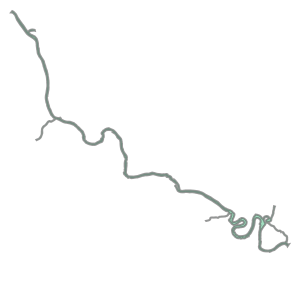

In [4]:
water.loc[1, "geometry"]

The rights projection needs to be given, we use crs 4326 or ws84 throughout this project

In [5]:
buildings = gpd.read_file("OS OPENMAP data/NY_Building.shp",crs=4326)
buildings.to_crs(epsg=4326,inplace=True)

#### Can be accessed through the geometry:

In [6]:
print(buildings.geometry.loc[1])

POLYGON Z ((-3.488364847795582 55.19630813928523 0, -3.4884837864289273 55.196051460612466 0, -3.4886627994675625 55.19607857238744 0, -3.488544152528081 55.19633461860059 0, -3.488364847795582 55.19630813928523 0))


#### And also be accessed like a dataframe:

In [7]:
buildings.head(3)

,ID,FEATCODE,geometry
0,196E437B-DF95-4AAC-8DCD-3AE7137ED5B8,15014,"POLYGON Z ((-3.48898 55.19658 0.00000, -3.4889..."
1,513B3F0E-7A1E-40B7-B433-D8136821691F,15014,"POLYGON Z ((-3.48836 55.19631 0.00000, -3.4884..."
2,6E3FA3FD-9BC9-4B6A-8B71-5BBFCA97A199,15014,"POLYGON Z ((-3.48842 55.19672 0.00000, -3.4885..."


#### Can use the .distance function to find the distance between objecs

In [8]:
buildings.geometry.loc[1].distance(buildings.geometry.loc[0])

0.00023631284650329958

#### This however uses the centres of objects:

In [9]:
n = 2
sub_section_buildings = buildings.loc[0:n]
centers = sub_section_buildings.centroid

C:\Users\david\AppData\Local\Temp\ipykernel_15772\3704405234.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centers = sub_section_buildings.centroid


In [10]:
for i in range(n):
    text_out = f'closest:{buildings.geometry.loc[i].distance(buildings.geometry.loc[i+1])*10**5:.3f}m, centers:\
    {centers.geometry.loc[i].distance(centers.geometry.loc[i+1])*10**5:.3f}m'

#### Which can be seen below:

Text(0.5, 1.0, 'closest:39.367m, centers:    57.858m')

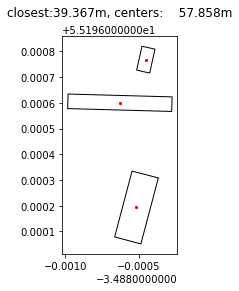

In [11]:
base = sub_section_buildings.plot(color='white', edgecolor='black')
centers.plot(ax=base, marker='o', color='red', markersize=5)
plt.title(text_out,pad=20)
# plt.savefig("Buildings with centroids.jpg")

#### Now lets load in the data for hourly stations:

In [12]:
stations = gpd.read_file("Hourly Gauges/Hourly-Gauges-Cumbria.shp")
stations.set_index("src_id").head(3)

,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry
src_id,,,,,,,,,
00289,KIELDER CASTLE,kielder-castle,northumberland,55.234,-2.580,201,2013,2020,POINT (-2.58000 55.23400)
00319,BOLTSHOPE PARK,boltshope-park,durham,54.821,-2.090,434,1994,2007,POINT (-2.09000 54.82100)
00339,BAINBRIDGE,bainbridge,north-yorkshire,54.308,-2.101,210,2010,2020,POINT (-2.10100 54.30800)


In [13]:
stations.head(3)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry
0,00289,KIELDER CASTLE,kielder-castle,northumberland,55.234,-2.580,201,2013,2020,POINT (-2.58000 55.23400)
1,00319,BOLTSHOPE PARK,boltshope-park,durham,54.821,-2.090,434,1994,2007,POINT (-2.09000 54.82100)
2,00339,BAINBRIDGE,bainbridge,north-yorkshire,54.308,-2.101,210,2010,2020,POINT (-2.10100 54.30800)


In [14]:
def building_distance(df_row):
    return df_row.geom_type

In [15]:
stations["distance"] = stations.geometry.apply(building_distance)
stations.head(3)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry,distance
0,00289,KIELDER CASTLE,kielder-castle,northumberland,55.234,-2.580,201,2013,2020,POINT (-2.58000 55.23400),Point
1,00319,BOLTSHOPE PARK,boltshope-park,durham,54.821,-2.090,434,1994,2007,POINT (-2.09000 54.82100),Point
2,00339,BAINBRIDGE,bainbridge,north-yorkshire,54.308,-2.101,210,2010,2020,POINT (-2.10100 54.30800),Point


Above we can see how to apply a function to a geopandas frame and what type the geometry is <br>
Below we see how to plot(also shown above)

<AxesSubplot:>

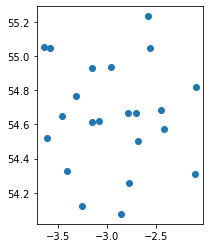

In [16]:
base = stations.geometry.plot()
sub_section_buildings.plot(ax=base)

We can then look at the distance to the closest house, exact code can be found in the functions.py

In [17]:
functions.distance_closest_house(stations.geometry.iloc[0],buildings)


5.832346928315608

We can then apply this function across the whole data frame

In [18]:
stations["distance"] = stations.geometry.apply(functions.distance_closest_house, buildings=buildings)

yielding:

In [19]:
stations.sort_values("distance").head(3)

,src_id,station_na,station_fi,historic_c,station_la,station_lo,station_el,first_year,last_year,geometry,distance
20,19203,BRIDGEFOOT,bridgefoot,cumbria,54.649,-3.459,49,2010,2020,POINT (-3.45900 54.64900),0.576315
8,01061,ASPATRIA,aspatria,cumbria,54.768,-3.316,62,1979,2004,POINT (-3.31600 54.76800),1.008948
11,01070,CARLISLE,carlisle,cumbria,54.934,-2.964,28,1961,2020,POINT (-2.96400 54.93400),3.118014


The station lat and lon are only to 3d.p. therefore aren't considered further